# Latar Belakang
Sistem transportasi TransJakarta merupakan salah satu solusi utama untuk mengatasi kemacetan lalu lintas dan menyediakan layanan transportasi publik yang efisien di Jakarta. Sebagai bagian integral dari sistem transportasi kota, TransJakarta dirancang untuk meningkatkan mobilitas masyarakat dengan menawarkan alternatif yang cepat dan terjangkau untuk perjalanan sehari-hari.

Namun, meskipun sistem ini telah beroperasi dengan tujuan meningkatkan mobilitas, sejumlah tantangan operasional masih mempengaruhi efisiensi dan pengalaman penumpang. Salah satu tantangan utama adalah kurangnya fasilitas khusus yang dapat memenuhi kebutuhan semua pengguna. Misalnya, belum adanya area khusus untuk wanita atau kursi prioritas untuk kelompok umur lansia, yang dapat mempengaruhi kenyamanan dan keamanan penumpang selama perjalanan.

Selain itu, lamanya antrian untuk menunggu armada bus adalah masalah lain yang signifikan. Penumpang sering kali harus menunggu dalam waktu yang cukup lama sebelum bus tiba, yang dapat menyebabkan ketidaknyamanan dan ketidakpuasan, terutama selama jam sibuk atau di halte-halte dengan tingkat kepadatan yang tinggi.

Masalah-masalah ini memerlukan perhatian dan solusi yang terencana untuk memastikan bahwa layanan TransJakarta tidak hanya efektif dalam mengurangi kemacetan tetapi juga menyediakan pengalaman perjalanan yang memuaskan bagi semua penggunanya. Dengan menganalisis data operasional yang ada, seperti waktu tunggu bus, jumlah penumpang, dan kepuasan pengguna, kita dapat mengidentifikasi area perbaikan dan merancang langkah-langkah strategis untuk meningkatkan layanan dan kenyamanan penumpang.


## Pernyataan Masalah
Perusahaan transportasi seperti TransJakarta ingin meningkatkan efisiensi operasional dan pengalaman penumpang. Untuk mencapai tujuan ini, mereka perlu memahami perilaku dan pola perjalanan penumpang. Informasi ini akan membantu dalam perencanaan rute, pengelolaan jadwal, dan peningkatan layanan pelanggan.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015). 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv('Transjakarta.csv')

In [36]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


Dataset ini berisi informasi terkait rekap layanan pengguna Transjakarta selama bulan April 2023, yang didapat setiap pengguna melakukan tap in dan tap out pada masing-masing halte yang mereka kunjungi. Terdapat 22 kolom pada dataset Transjakarta yaitu:  

1.	transID: ID unik untuk setiap transaksi
2.	payCardID: ID pelanggan pada kartu (digunakan sebagai tiket untuk masuk dan keluar)
3.	payCardBank: Bank penerbit pada kartu
4.	payCardName: Nama pelanggan pada kartu
5.	payCardSex: Jenis Kelamin pelanggan pada kartu
6.	payCardBirthDate: Tahun lahir pelanggan pada kartu
7.	corridorID: ID koridor / ID rute sebagai key untuk kelompok rute
8.	corridorName: Nama koridor / nama rute yang berisi Start and Finish setiap rute
9.	direction: Arah rute : 0 berarti go, 1 berarti back
10.	tapInStops: ID halte customer melakukan tap in
11.	tapInStopsName: Name halte customer melakukan tap in
12.	tapInStopsLat: Latitude halte customer melakukan tap in
13.	tapInStopsLon: Longitude halte customer melakukan tap in
14.	stopStartSeq: Sequence pemberhentian dari halte tap in (pemberhentian pertama, pemberhentian kedua, dst sesuai arah)
15.	tapInTime: Waktu customer melakukan tap in
16.	tapOutStops: ID halte customer melakukan tap out
17.	tapOutStopsName: Nama halte customer melakukan tap out
18.	tapOutStopsLat: Latitude halte customer melakukan tap out
19.	tapOutStopsLon: Longitude halte customer melakukan tap out
20.	stopEndSeq: Sequence pemberhentian dari halte tap out (pemberhentian pertama, pemberhentian kedua, dst sesuai arah)
21.	tapOutTime: Waktu customer melakukan tap out
22.	payAmount: Nilai rupiah yang dibayarkan customer (beberapa ada yang gratis)


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat dan periksa informasi-informasi yang bisa kita dapat dari dataset transjakarta.

In [47]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [38]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [48]:
# pd.set_option('display.max_colwidth', 0)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


Secara umum, kita bisa melihat bahwa:
* dataset transjakarta memiliki 22 kolom dan 37900 baris
* terdapat beberapa kolom yang memiliki data kosong, yaitu, `corridorId`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `stopEndSeq` memiliki data tipe float, namun kolom `stopStartSeq` memiliki data tipe int. Untuk mempermudah analisis, kita perlu menyamakan datanya menjadi tipe int sehubungan 2 kolom ini saling berkolerasi.

### Missing Value

In [49]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Missing values yang terjadi pada suatu row biasanya akan mengakibatkan keanomalian dalam analisa data. Solusi dari missing values biasanya ditangani dengan cara antara lain :
- memperbaiki baris yang memiliki kolom mana yang sekiranya memungkinkan untuk bisa diisikan dengan nilai sebenarnya atau sedekat mungkin dengan nilai asli.
- menghapus baris untuk yang memiliki kolom missing values yang sudah tidak dapat diperbaiki karena tidak ada korelasi data yang memungkinkan untuk melakukan pendekatan pada nilai yang dapat diisikan. Opsi ini menjadi jalan terakhir apabila memang tidak memungkinkan untuk diperbaiki.


Apabila kita melihat data missing values di atas secara presentase, dapat dilihat bahwa :
- missing values yang terjadi pada beberapa kolom tidak terlalu memiliki proporsi yang cukup tinggi.
- terdapat proporsi yang sama pada beberapa kolom tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon,stopEndSeq, tapOutTime yang dimana berarti kemungkinan besar banyak data kombinasi data berkaitan tapOut pada suatu pemberhentian tidak terekap.

Setelah menganalisa missing values yang terjadi pada dataset TransJakarta, selanjutnya kita akan memulai untuk penanganan masing-masing missing values tersebut. 

#### `payAmount`
Kita mulai dengan mengecek jumlah data per masing-masing grouping dan juga mengecek jumlah NaN yang ada pada kolom payAmount.

In [56]:
df['payAmount'].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

In [59]:
df['payAmount'].isna().sum()

1007

Pada kolom `payAmount`, telah dijelaskan bahwa terdapat layanan TransJakarta yang gratis. Namun kita dapat melihat bahwa untuk pembayaran gratis diindikasikan dengan value 0, bukan NaN. Nilai Nan yang terjadi pun sangat sulit untuk diketahui masuk ke pendekatan value mana yang dapat kita gantikan sehubungan tidak ada nya korelasi yang unik, sehingga kita memutuskan untuk melakukan drop pada values NaN yang terjadi pada kolom `payAmount`.

In [70]:
df.dropna(subset=['payAmount'], how='all', inplace=True)

#### `corridorID` dan `corridorName`
Sehubungan kolom `corridorID` dan `corridorName` memiliki korelasi antara ID dan deskripsi dan apabila 2 data ini sama-sama tidak memiliki values, maka kita memutuskan untuk melakukan drop pada kombinasi kolom `corridorID` dan `corridorName` yang sama-sams memiliki missing values.

In [61]:
df.dropna(subset=['corridorID', 'corridorName'], how='all', inplace=True)

Untuk baris yang kolom `corridorID` yang kosong namun memiliki value pada kolom `corridorName`  kita akan melakukan pengisian dengan mengecek pada baris-baris lain yang memiliki informasi sama dan kita dapat gantikan missing values tersebut sesuai dengan values yang suda ada dari baris lain sesuai `corridorName` yang sama.

In [62]:
nan_corridor_names = df[df['corridorName'].isna()]

# Create a dictionary to map corridorID to corridorName
corridor_dict = df.dropna(subset=['corridorName']).set_index('corridorID')['corridorName'].to_dict()

# Replace NaN values in 'corridorName' with the corresponding values from the dictionary
df['corridorName'] = df.apply(
    lambda row: corridor_dict.get(row['corridorID'], row['corridorName']),
    axis=1
)

Begitu juga sebaliknya, Untuk baris yang kolom `corridorName` yang kosong namun memiliki value pada kolom `corridorID`  kita akan melakukan pengisian dengan mengecek pada baris-baris lain yang memiliki informasi sama dan kita dapat gantikan missing values tersebut sesuai dengan values yang suda ada dari baris lain sesuai `corridorID` yang sama.

In [63]:
corridor_id_dict = df.dropna(subset=['corridorID']).set_index('corridorName')['corridorID'].to_dict()

# Replace NaN values in 'corridorID' with the corresponding values from the dictionary
df['corridorID'] = df.apply(
    lambda row: corridor_id_dict.get(row['corridorName'], row['corridorID']),
    axis=1
)

#### `tapInStops`
untuk baris yang memiliki kolom `tapInStops` yang kosong, kita juga dapat melakukan pengisian data dengan cara yang sama seperti pada perlakuan `corridorID` dan `corridorName`, namun kita akan melakukan pendekatan penggantian values dengan menggunakan kolom `tapInStopsName` sebagai acuan untuk pengisian `tapInStops` yang sama. 

In [67]:
tapInStops_dict = df.dropna(subset=['tapInStops']).set_index('tapInStopsName')['tapInStops'].to_dict()

# Replace NaN values in 'corridorID' with the corresponding values from the dictionary
df['tapInStops'] = df.apply(
    lambda row: tapInStops_dict.get(row['tapInStopsName'], row['tapInStops']),
    axis=1
)
df.dropna(subset=['tapInStops'], how='all', inplace=True)

#### `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSe`, `tapOutTime`
Untuk baris yangn memiliki missing values pada kolom-kolom yang berhubungan tapOut, hal pertama yang kita lakukan yaitu melakukan drop pada kombinasi kolom-kolom tersebut yang sama-sama memiliki missing values.

In [66]:
df.dropna(subset=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'], how='all', inplace=True)


untuk baris yang memiliki kolom `tapOutStops` yang kosong, kita juga dapat melakukan pengisian data dengan cara yang sama seperti pada perlakuan `corridorID` dan `corridorName`, namun kita akan melakukan pendekatan penggantian values dengan menggunakan kolom `tapOutStopsName` sebagai acuan untuk pengisian `tapOutStops` yang sama. 

In [68]:
tapOutStops_dict = df.dropna(subset=['tapOutStops']).set_index('tapOutStopsName')['tapOutStops'].to_dict()

# Replace NaN values in 'corridorID' with the corresponding values from the dictionary
df['tapOutStops'] = df.apply(
    lambda row: tapOutStops_dict.get(row['tapOutStopsName'], row['tapOutStops']),
    axis=1
)
df.dropna(subset=['tapOutStops'], how='all', inplace=True)

#### `stopEndSeq`
Karena kita akan melakukan kalkulasi antara kolom stopEndSeq dan kolom stopStartSeq untuk mengetahui jumlah jalur rute armada bus yang dilalui dan masing-masing kolom memiliki tipe data yang berbeda, kita akan konversikan kolom stopEndSeq dari float menjadi int.

In [134]:
df['stopEndSeq'] = df['stopEndSeq'].astype(int)

Setelah semua proses cleaning missing values telah kita lakukan, berikutnya kita akan melakukan cek ulang untuk persentase missing values yang masih tersisa

In [72]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.0
payCardID           0.0
payCardBank         0.0
payCardName         0.0
payCardSex          0.0
payCardBirthDate    0.0
corridorID          0.0
corridorName        0.0
direction           0.0
tapInStops          0.0
tapInStopsName      0.0
tapInStopsLat       0.0
tapInStopsLon       0.0
stopStartSeq        0.0
tapInTime           0.0
tapOutStops         0.0
tapOutStopsName     0.0
tapOutStopsLat      0.0
tapOutStopsLon      0.0
stopEndSeq          0.0
tapOutTime          0.0
payAmount           0.0
dtype: float64

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [28]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(34487, 26)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,34487,"[UJZV109B2A08BU, DXEE478A5H30YR]"
1,payCardID,int64,0,1941,"[5220242748386167, 30218688993296]"
2,payCardBank,object,0,6,"[online, brizzi]"
3,payCardName,object,0,1934,"[Drs. Cengkal Astuti, S.Gz, Galar Sitompul]"
4,payCardSex,object,0,2,"[M, F]"
5,payCardBirthDate,int64,0,66,"[2006, 1959]"
6,corridorID,object,0,211,"[JAK.52, JAK.21]"
7,corridorName,object,0,211,"[Grogol - Tubagus Angke, Kampung Melayu - Tana..."
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2466,"[B00444P, B00376P]"


Sebelum dibersihkan, kita memiliki 37,900 baris data, sekarang kita memiliki 34,487 baris. Sekitar 3000 baris data yang kosong dihapus, dan sisa data kosong telah diisi dengan data yang dirasa relevan.

# Data Analysis
Setelah melakukan tahap _data cleaning_, kita akan mencari tahu apa saja hal-hal yang sekiranya dapat dianalisa untuk mencari tahu kualitas layanan yang dapat ditingkatkan dengan melihat proporsi pengguna (kelompok umur dan jenis kelamin), tingkat kepadatan halte, dan performa armada bus yang beroperasi.


### Berdasarkan proporsi pengguna (Umur, Jenis Kelamin)

Pertama kita melihat distribusi pengguna layanan TransJakarta yang akan kita pantau dengan menganalisis :
- Jumlah masing-masing kelompok umur pengguna (menggunakan kolom Age yang telah digrouping setiap 10 tahun) dalam visualisasi histogram. 
- Proporsi antara jenis kelamin laki-laki dan perempuan (menggunakan kolom payCardSex sebagai dimensi dan count payCardSex sebagai measure) dalam visualisasi pie chart

In [73]:
df['age'] = 2023 - df['payCardBirthDate']

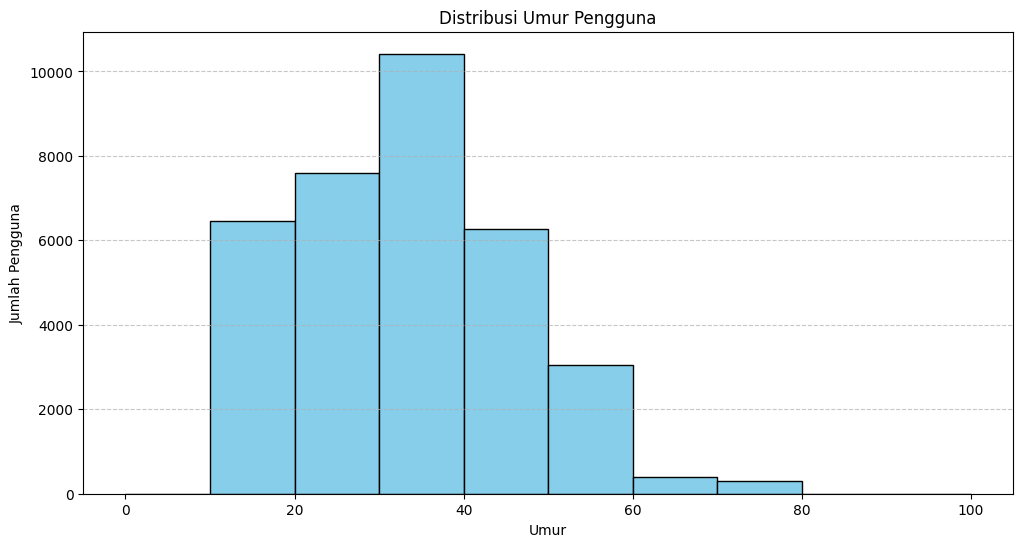

In [74]:
plt.figure(figsize=(12, 6))

# Membuat histogram dengan interval 10 tahun
plt.hist(df['age'], bins=np.arange(0, 110, 10), edgecolor='black', color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Umur')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Umur Pengguna')

# Menambahkan grid pada sumbu y
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mengatur label sumbu x untuk menampilkan rentang umur

plt.show()

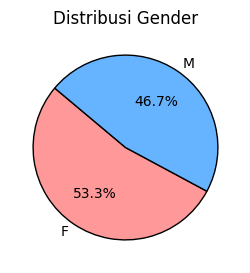

In [186]:
gender_counts = df['payCardSex'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',  # Menampilkan persentase dengan satu angka desimal
    colors=['#ff9999','#66b3ff'],  # Warna pie chart
    startangle=140,  # Memulai pie chart dari sudut tertentu
    wedgeprops={'edgecolor': 'black'}  # Menambahkan garis hitam di tepi setiap wedge
)

plt.title('Distribusi Gender')
plt.show()

In [75]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Rentang umur
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70','70-80']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [76]:
count_per_age_range = df['age_range'].value_counts().sort_index()
print("Jumlah data per kelompok umur:")
print(count_per_age_range)

# Menyiapkan data untuk ANOVA
# Mengelompokkan data berdasarkan kelompok umur
grouped_data = [df[df['age_range'] == group]['age_range'] for group in df['age_range'].unique()]


Jumlah data per kelompok umur:
age_range
0-10         0
10-20     6448
20-30     7591
30-40    10421
40-50     6268
50-60     3056
60-70      393
70-80      310
Name: count, dtype: int64


Dari hasil grafik di atas, dapat dikatakan bahwa :
- Dari segi usia: 
    - pengguna terbanyak secara mayoritas berasal dari kelompok umur 30-40 tahun
    - Terdapat sejumlah kelompok lansia yang tidak sedikit dalam menggunakan layanan TransJakarta sehingga perlu dipertimbangkan fasilitas khusus untuk kaum lansia, contohnya penambahan jumlah kursi prioritas
    - Terdapat sejumlah kelompok usia dibawah 20 tahun yang normalnya merupakan kaum pelajar yang berarti sebagian besar kaum muda telah mendukung program pemerintah. Untuk dapat mengajak kaum muda lainnya, dapat dipertimbangkan untuk penerapan fasilitas subsidi khusus bagi para kaum pelajar.

- Dari segi jenis kelamin, proporsi pengguna perempuan lebih banyak daripada pengguna laki-laki. Hal ini juga menjadi perhatian khusus bagi pemerintah untuk dapat memberikan area khusus bagi wanita.


### Berdasarkan waktu tempuh rata-rata dan jumlah rute terbanyak

Berikutnya kita ingin menganalisa untuk waktu perjalanan dan rute koridor layanan Transjakarta. 2 Hal ini perlu kita ketahui agar kita dapat membuktikan apakah lamanya waktu perjalanan suatu armada bus dikarenakan apakah memang rute tersebut merupakah yang paling banyak beroperasi.

In [77]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')
df['TravelTime'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

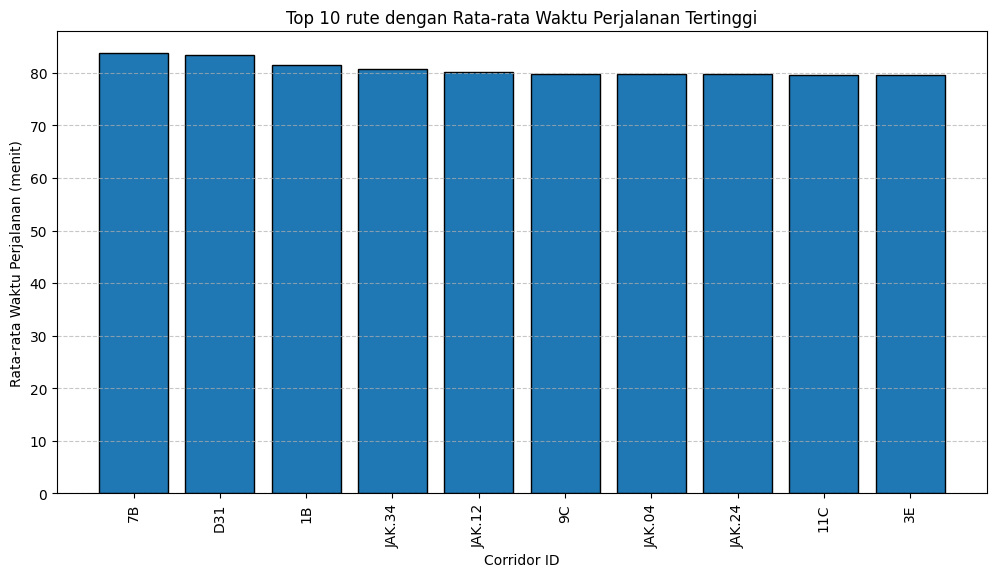

In [144]:
average_travel_time = df.groupby('corridorID')['TravelTime'].mean()
top_10_average_travel_time = average_travel_time.nlargest(10)

plt.figure(figsize=(12, 6))

# Membuat bar chart
plt.bar(top_10_average_travel_time.index.astype(str), top_10_average_travel_time.values,  edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Corridor ID')
plt.ylabel('Rata-rata Waktu Perjalanan (menit)')
plt.title('Top 10 rute dengan Rata-rata Waktu Perjalanan Tertinggi')

plt.xticks(rotation=90)  # Memutar label sumbu x untuk kejelasan
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [135]:
df['Route'] = df['stopEndSeq'] - df['stopStartSeq']

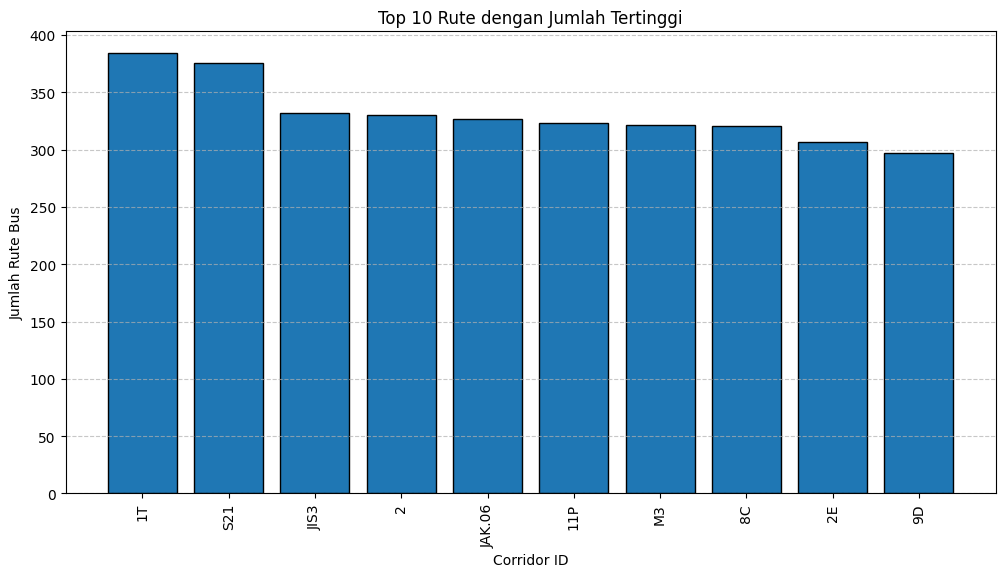

In [145]:
total_route_count = df.groupby('corridorID')['corridorID'].count()

# Mengambil 10 bus_id dengan jumlah rute tertinggi
top10_total_route_count = total_route_count.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Membuat bar chart
plt.bar(top10_total_route_count.index.astype(str), top10_total_route_count.values,  edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Corridor ID')
plt.ylabel('Jumlah Rute Bus')
plt.title('Top 10 Rute dengan Jumlah Tertinggi')

plt.xticks(rotation=90)  # Memutar label sumbu x untuk kejelasan
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [140]:
df1 = df.groupby(['corridorID','corridorName'])['TravelTime'].mean().sort_values(ascending=False).head(10).reset_index(name='AverageTravelTime')
df2 = df.groupby(['corridorID','corridorName'])['corridorID'].count().sort_values(ascending=False).head(10).reset_index(name='Count')

In [141]:
df_union_all = pd.concat([df1, df2], ignore_index=True)
df_union_all[['corridorID','corridorName']]

,corridorID,corridorName
0,7B,Kampung Rambutan - Blok M
1,D31,Cinere - Kuningan
2,1B,Stasiun Palmerah - Tosari
3,JAK.34,Rawamangun - Klender
4,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben
5,9C,Pinang Ranti - Bundaran Senayan
6,JAK.04,Grogol - Tubagus Angke
7,JAK.24,Senen - Pulo Gadung via Kelapa Gading
8,11C,Rusun Pinus Elok - Rusun Pulo Gebang
9,3E,Puri Kembangan - Sentraland Cengkareng



Dari hasil visualisasi di atas, dapat dikatakan bahwa :
- Range waktu tempuh rata-rata terlama menggunakan TransJakarta menghabiskan sekitar 70–80 menitan, yang dimana dengan rata-rata waktu tempuh terlama dimiliki oleh kode Bus 7B, jurusan Kampung Rambutan- Blok M sebesar 80 menit lebih. 
- Kita bisa melihat bahwa armada bus yang menjadi top 10 waktu tempuh rata-rata terlama selama beroperasi tidak menjadi top 10 rute terbanyak yang beroperasi. Hal ini membuktikan bahwa lamanya waktu perjalanan suatu armada bus tidak berbanding lurus dengan banyaknya jumlah suatu rute beroperasi. 

### Berdasarkan Keramaian Halte

Berikutnya kita ingin menganalisa untuk keramaian halte keberangkatan dan halte tujuan guna mengetahui halte mana yang sering dikunjungi dan dimanfaatkan oleh masyarakat.

In [123]:
def get_time_range(dt):
    hour = dt.hour
    if 0 <= hour < 6:
        return '00.00-06.00'
    elif 6 <= hour < 9:
        return '06.00-09.00'
    elif 9 <= hour < 12:
        return '09.00-12.00'
    elif 12 <= hour < 16:
        return '12.00-16.00'
    elif 16 <= hour < 20:
        return '16.00-20.00'
    elif 20 <= hour < 22:
        return '20.00-22.00'
    else:
        return '22.00-24.00'

In [126]:
df['time_range'] = df['tapInTime'].apply(get_time_range)

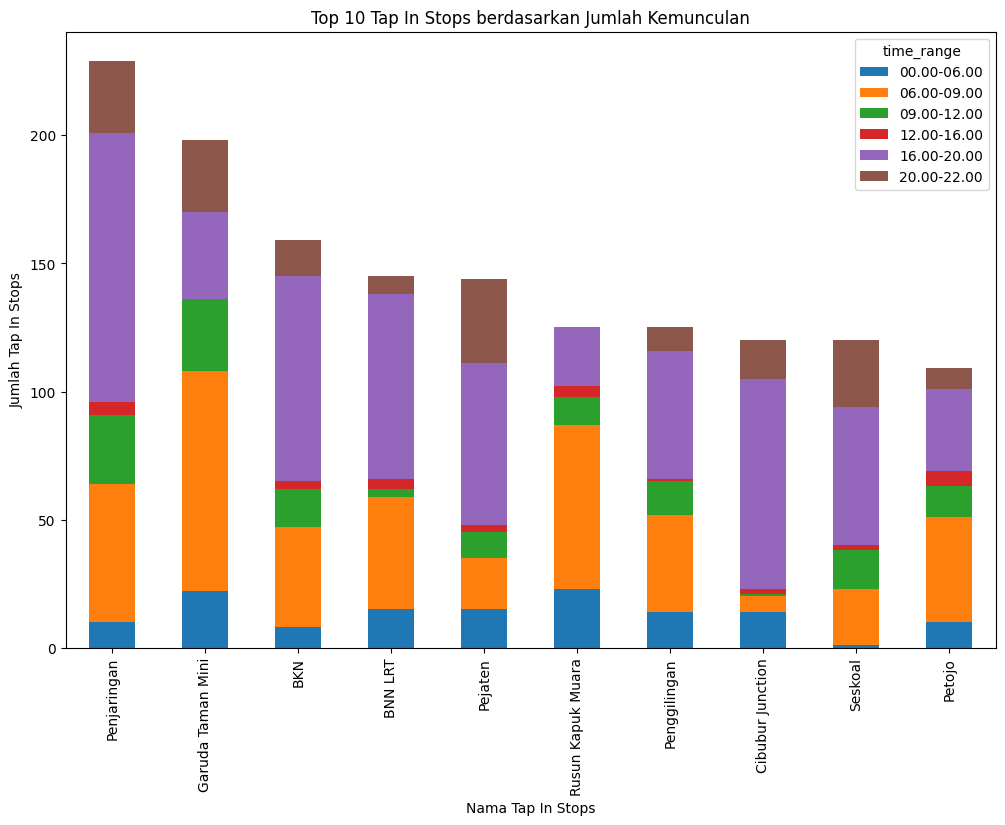

In [127]:
ct = pd.crosstab(df['tapInStopsName'], df['time_range'])
ct = ct.loc[ct.sum(axis=1).sort_values(ascending=False).head(10).index]
ct.plot(kind='bar', stacked=True, figsize=(12, 8))



plt.xlabel('Nama Tap In Stops')
plt.ylabel('Jumlah Tap In Stops')
plt.title('Top 10 Tap In Stops berdasarkan Jumlah Kemunculan')
plt.xticks(rotation=90)
plt.show()

In [128]:
df['time_range_out'] = df['tapOutTime'].apply(get_time_range)

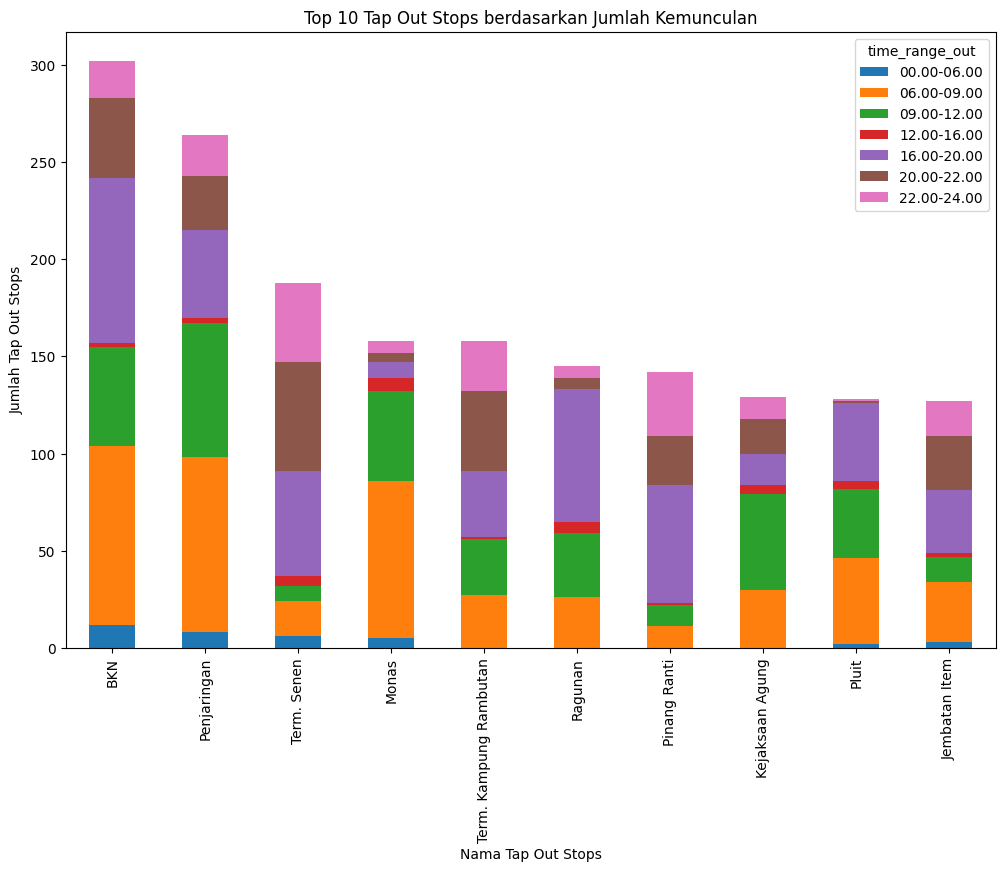

In [129]:
ct = pd.crosstab(df['tapOutStopsName'], df['time_range_out'])
ct = ct.loc[ct.sum(axis=1).sort_values(ascending=False).head(10).index]
ct.plot(kind='bar', stacked=True, figsize=(12, 8))



plt.xlabel('Nama Tap Out Stops')
plt.ylabel('Jumlah Tap Out Stops')
plt.title('Top 10 Tap Out Stops berdasarkan Jumlah Kemunculan')
plt.xticks(rotation=90)
plt.show()

Dari hasil visualisasi di atas, dapat dikatakan bahwa :
- Halte Penjaringan memiliki nilai tertinggi untuk keberangkatan (tap In) dan halte BKN memiliki nilai tertinggi untuk kedatangan (tap Out). Kita juga melihat bahwa halte Penjaringan juga menduduki posisi 2 dalam nilai tertinggi untuk kedatangan (tap Out). Hal ini menunjukkan bahwa mayoritas pengguna TransJakarta banyak melakukan kegiatan di sekitar wilayah Penjaringan atau BKN. Penambahan armada di sekitar halte yang memiliki aktivitas tinggi akan meningkatkan kualitas layanan TransJakarta agar tidak terjadi keterlambatan waktu mengingat Kota Jakarta adalah salah satu kota termacet di Indonesia.
- Mayoritas masyarakat menggunakan layanan transJakarta pada range jam 06.00 - 09.00 dan 16.00 - 20.00. Range jam tersebut merupakan jam aktivitas untuk para pekerja berangkat dan pulang dari tempat kerja sehingga dapat dipetimbangkan untuk lebih menambahkan armada pada jam-jam tertentu yang memiliki puncak aktivitas tertinggi.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang bagaimana untuk meningkatkan layanan TransJakarta guna menarik minat masyarakat lain:
* Pengguna layanan transJakarta terbesar adalah di kelompok umur 30-40 tahun
* Terdapat sejumlah kelompok lansia dan kelompok anak-anak yang ternyata juga menggunakan layanan TransJakarta
* Proporsi pengguna layanan TransJakarta antara laki-laki dan perempuan kurang lebih sama
* Rata-rata waktu tempuh terlama suatu rute adalah corridor ID 7B (Kampung Rambutan - Blok M)
* Jumlah rute terbanyak yang beroperasi adalah corridor ID 1T (Cibubur - Balai Kota)
* Titik keramaian halte berada di lokasi BKN untuk tap Out dan Penjaringan untuk tap In dan tap Out
* Tingkat puncak aktivitas layanan TransJakarta banyak berada pada range jam 06.00-09.00 dan 16.00-20.00.


Karakteristik layanan TransJakarta adalah sebagai berikut:
* Mayoritas pengguna layanan transJakarta adalah di umur 20-50 tahun dan tingkat puncak aktivitas layanan TransJakarta terjadi di jam 06.00-09.00 dan 16.00-20.00. Hal ini mengindikasikan bahwa mayoritas pengguna layanan TransJakarta adalah berasal dari kalangan pekerja aktif.
* Rata-rata waktu tempuh terlama suatu rute tidak selalu memiliki rute operasi paling banyak.

**Rekomendasi**
1. Seiring dengan adanya jumlah kelompok umur lansia yang tidak sedikit yang memakai layanan TransJakarta, pengimplementasian tambahan fasilitas kursi prioritas kepada sejumlah lansia akan menjadi sangat penting demi kenyamanan dan daya tarik bagi para kaum lansia lainnya.sama banyak nya dengan kaum laki-laki.
2. Penerapan fasilitas subsidi khusus terhadap kalangan kelompok pelajar dengan usia di bawah 20 tahun juga dapat menjadi salah satu cara untuk mengajak kalangan kaum muda lainnya dalam hal memperkenalkan fasilitas TransJakarta.
3. Pengimplementasian tambahan fasilitas ruang khusus perempuan dalam layanan TransJakarta juga akan menjadi daya tarik tambahan bagi para kaum perempuan untuk terus menggunakan layanan TransJakarta mengingat jumlah proporsi kaum perempuan 
4. Fokus penambahan armada bus untuk :
    * Armada yang memiliki rata-rata waktu tempuh terlama dalam suatu rute dikarenakan kemungkinan besar terjadi kemacetan, yaitu bus ID 7B (Kampung Rambutan - Blok M)
    * Armada yang bertugas pada titik keramaian halte paling tinggi, yaitu BKN dan Penjaringan
    * Armada yang bertugas pada range jam 06.00-09.00 dan 16.00-20.00


